# 統計量を求める

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
std_norm = np.random.randn(5, 5)
std_norm

array([[ 1.91610866, -0.02790456, -1.16106511,  1.40351665, -0.75773115],
       [ 0.17272347,  0.92941541, -0.1156553 ,  0.24760461, -0.13248097],
       [ 0.76139246,  0.45700144, -0.79796229,  0.7437242 , -0.18897535],
       [ 1.40891704,  0.32622134,  0.46620089,  0.79240663,  1.69051474],
       [ 0.82008073,  1.36455541,  1.91785355,  0.03579585,  1.08832216]])

- 平均　０　分散　１　の　**標準平均分布**　から random な値を取得したもの

In [3]:
# 最大値
std_norm.max()

1.9178535512111174

In [4]:
np.max(std_norm)

1.9178535512111174

In [5]:
# 最小値
std_norm.min()

-1.1610651122128237

In [6]:
np.min(std_norm)

-1.1610651122128237

In [7]:
# 最大値の index を取得
std_norm.argmax()

22

In [8]:
std_norm.flatten()[17]

0.4662008893692126

In [9]:
# 最小値の index を取得
std_norm.argmin()

2

In [10]:
std_norm.flatten()[20]

0.8200807265773383

In [11]:
# 平均値 : mean
std_norm.mean()

0.5344232209368285

- 今回は　**標準平均分布**　から取得してきているので、 平均値は　０　にかなり近い

In [12]:
std_norm = np.random.randn(50, 50)
std_norm

array([[-1.30684326, -0.72541899, -0.04249508, ..., -0.59339305,
         1.14887073,  0.00980663],
       [-0.70667479, -1.4892467 ,  0.28363298, ...,  0.44586649,
        -0.1094156 ,  0.0149125 ],
       [-0.36224564,  1.48364036,  0.87166083, ..., -0.25415848,
         0.35514808,  0.729526  ],
       ...,
       [ 1.00861136, -0.63822848,  1.57914202, ..., -0.74736084,
        -1.73886252,  1.13373964],
       [-0.08298842, -0.20838489,  1.40918668, ...,  0.92919341,
         0.09070178, -0.64519448],
       [ 0.09814577,  1.77946366, -1.25171232, ...,  0.70974786,
        -0.97379012, -0.88820071]])

In [13]:
std_norm.mean()

-0.002114925528188499

- 値が増えれば増えるほど　**限りなく　0　に近づいている**

In [14]:
# 中央値　: median()
np.median(std_norm)

-0.009128209304087429

In [15]:
std_norm.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

#### median( ) だけ　ndarray ではなく, np.median(ndarray) を使用する
- ndarray は直接使用できないので注意する！！
    - *上記のように　error がでる*

- <u>中央値</u>
    - *平均値より時間がかかる・外れ値に強い*
        - 5, 16, 22, 1, 530, 22, 10, 2, 21
        - 並び替える　↓　　※ <u>並び替えに結構時間がかかる</u>
        - 1, 2, 5, 10, 16, 21, 22, 22, 530(外れ値)
        - **中央値　=　16**


- <u>平均値</u>
    - *最初の数字から足していけばOK* ->　*並び替える必要がない*
        - 5, 16, 22, 1, 530, 22, 10, 2, 21　=　629 / 9　=　69.9
        - *530 = 外れ値*
        - **外れ値の値の影響をもろに受ける**
            - <u>平均値が実際より高く引き上げられてしまう</u>

In [16]:
# 中央値 vs 平均値
import time
a = np.random.randn(1000, 1000)
before = time.time()
np.median(a)
after_median = time.time()
np.mean(a)
after_mean = time.time() 
print('median took {} sec'.format(after_median-before))
print('mean took {} sec'.format(after_mean-after_median))

median took 0.0165097713470459 sec
mean took 0.0009140968322753906 sec


In [17]:
np.mean(a)

0.0009854089716347457

## 標準偏差
- <u>平均との差を２乗した合計を, データ数で割った正の平方根</u>
    1. 5, 16, 22, 1, 530, 22, 10, 2, 21
    2. 5, 16, 22, 1, 530, 22, 10, 2, 21　=　629 / 9　=　69.9
    3. (69.9 - 5)**2 他もこのように計算して足していく
    4. 合計　238734 / 9 個　= 162.8(**分散**)　=　σ ２乗の部分


### **68 - 95 - 99.7rule**
- **正規分布では**
    - 平均から　**± １**　標準偏差には約　**68%**　のデータが　$$\mu-\sigma,  \mu+\sigma$$
    - 平均から　**± 2**　標準偏差には約　**95%**　のデータが　$$\mu-2\sigma,  \mu+2\sigma$$
    - 平均から　**± 3**　標準偏差には約　**99%**　のデータが　$$\mu-3\sigma,  \mu+3\sigma$$
        - 含まれるという経験則がある


- <u>あくまで上記は　**正規分布**　の時だけ</u>

In [18]:
# std = 分散の平方根 = σ（シグマ） / 標準偏差を取得
np.std(std_norm)

1.010681104376144

### それぞれの行・列ごとの統計量も求める事ができる

In [19]:
std_norm.max()

4.31967242498841

In [20]:
# 列毎の最大
std_norm.max(axis=0)

array([2.94075589, 1.77946366, 1.86472564, 1.38388428, 2.11840537,
       2.12700394, 1.63850451, 2.35210413, 2.26289831, 1.77899925,
       1.83900232, 2.13783584, 2.29377655, 2.57805916, 2.39762099,
       2.38544606, 1.31067803, 1.78017758, 2.30190072, 1.77396818,
       2.32902199, 2.2900696 , 1.7036008 , 2.77621452, 2.18305186,
       2.6176476 , 0.72664433, 4.31967242, 1.88434645, 2.45319683,
       1.91949725, 2.00883709, 2.39916693, 2.33515079, 2.30545722,
       2.75148545, 2.24029181, 2.46469758, 2.93466522, 2.18388166,
       2.25028433, 2.09947659, 1.90977828, 2.51510916, 2.44592745,
       2.21071077, 2.35830935, 2.31417512, 3.1566172 , 2.48148456])

In [21]:
# 行毎の最大
std_norm.max(axis=1)

array([2.30545722, 1.91519514, 1.95825346, 2.39762099, 2.22311389,
       2.19747767, 1.93519428, 2.35210413, 2.30190072, 2.46469758,
       2.89660835, 1.94014381, 1.77899925, 2.57805916, 2.25028433,
       1.85026347, 1.79010192, 2.51510916, 2.24029181, 2.0368097 ,
       2.21200938, 2.16953087, 1.92524824, 2.14481863, 2.18305186,
       1.98568896, 4.31967242, 1.59991154, 2.93466522, 1.99345497,
       1.90738545, 2.35114981, 2.29005311, 2.58057203, 2.45319683,
       1.93948237, 1.90962435, 2.75148545, 1.6670996 , 2.69078351,
       2.05974552, 2.12620756, 1.57892918, 2.94075589, 1.97162362,
       2.48148456, 2.6176476 , 1.57914202, 2.44592745, 2.19814582])

- max, min などを指定することで、行毎、列毎の統計量を計算可能
    - **axis = 0**　:　列毎
    - **axis = 1**　:　行毎


- **axis=0**　はそれぞれの列に対してだったり、それぞれの行ラベル(インデックス)に対してメソッドを適用する場合に用いる


- **axis=1**　はそれぞれの行だったり、列ラベル(列名)に対してメソッドを適用する場合に用いる

([], <a list of 0 Text yticklabel objects>)

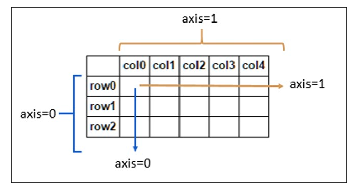

In [26]:
fn = r'axis.jpeg'
img = cv2.imread(fn)
# plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.xticks(ticks=[])
plt.yticks(ticks=[])